# H1 F1 Data Analysis - Sajni Shah
## Research Questions
1. Determines wether changes to the car ave a direct impact on faster lap times for the following year
2. Use driver performance data to try and predict a drivers final position based on their position in qualifying


## Data Retrieval and Standard Descriptive Analysis
My Data Set contains 11 CSV files containing race data from 1950 to 2023. This Data includes
1. CIRCUITS - Description about the location of each track that has been included in the F1 calenders from 1950 - present
2. CONSTRUCTOR RESULTS - Results based on the constructor teams
3. DRIVERS - Description about every driver that has raced in a F1 championship since 1950
4. DRIVER STANDINGS - Driver standings in each year since 1950
5. LAP TIMES - Lap times of every driver, from every race
6. PIT STOPS - Amount of pit stops and time the pit stops took
7. QUALIFYING - Qualifying position of each racer, from every race
8. RACES - Each race, at every location, winner, fastest lap, winning team
9. RESULTS - Results from each race
10. SEASONS - Results at the end of each season

**This data set was found at :**
[Data set Link](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=circuits.csv)

**Historical list of all changes made to Formula 1 cars was found at**
[Changes to cars Link](https://en.wikipedia.org/wiki/History_of_Formula_One_regulations)

# Data Wrangling - Cleaning the data

We will be using the results.csv file mostly. To make the dataset usable, we need to clean it and remove the NaN values

In [106]:
import pandas as pd
results = pd.read_csv("results.csv")
results.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
5,6,18,6,3,8.0,13,6.0,6,6,3.0,57,NaN,NaN,50.0,14.0,1:29.639,212.974,11
6,7,18,7,5,14.0,17,7.0,7,7,2.0,55,NaN,NaN,22.0,12.0,1:29.534,213.224,5
7,8,18,8,6,1.0,15,8.0,8,8,1.0,53,NaN,NaN,20.0,4.0,1:27.903,217.180,5
8,9,18,9,2,4.0,2,NaN,R,9,0.0,47,NaN,NaN,15.0,9.0,1:28.753,215.100,4
9,10,18,10,7,12.0,18,NaN,R,10,0.0,43,NaN,NaN,23.0,13.0,1:29.558,213.166,3


In [107]:
results['fastestLapTime']

0        1:27.452
1        1:27.739
2        1:28.090
3        1:28.603
4        1:27.418
           ...   
25835    1:29.833
25836    1:31.158
25837    1:29.788
25838    1:30.309
25839    1:30.579
Name: fastestLapTime, Length: 25840, dtype: object

From research, I noticed that there are a lot more NaN values in the earlier recors because of the lack of recording devices in the 50s and 60s

In [108]:
results.describe()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25834.000000,25840.000000,14989.000000,25840.000000,25840.000000,25840.000000,7.087000e+03,7379.000000,7591.000000,7379.000000,25840.000000
mean,12921.334327,531.425813,261.732082,48.628328,17.790083,11.179063,7.942491,12.876006,1.877053,45.977515,6.231870e+06,42.514162,10.409959,203.089214,17.568692
std,7460.682031,299.440908,268.623016,59.732131,15.104842,7.243725,4.806021,7.712391,4.169849,29.808951,1.678933e+06,16.835664,6.162407,21.356876,26.155476
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.070710e+05,2.000000,0.000000,89.540000,1.000000
25%,6460.750000,293.000000,56.000000,6.000000,7.000000,5.000000,4.000000,6.000000,0.000000,22.000000,5.413270e+06,32.000000,5.000000,192.776000,1.000000
50%,12920.500000,514.000000,163.000000,25.000000,15.000000,11.000000,7.000000,12.000000,0.000000,52.000000,5.814618e+06,45.000000,10.000000,204.291000,11.000000
75%,19380.250000,784.000000,360.000000,58.000000,24.000000,17.000000,11.000000,18.000000,2.000000,66.000000,6.426264e+06,54.000000,16.000000,216.159500,14.000000
max,25845.000000,1096.000000,856.000000,214.000000,208.000000,34.000000,33.000000,39.000000,50.000000,200.000000,1.509054e+07,85.000000,24.000000,257.320000,141.000000


In [109]:
results.count()

resultId           25840
raceId             25840
driverId           25840
constructorId      25840
number             25834
grid               25840
position           14989
positionText       25840
positionOrder      25840
points             25840
laps               25840
time                7088
milliseconds        7087
fastestLap          7379
rank                7591
fastestLapTime      7379
fastestLapSpeed     7379
statusId           25840
dtype: int64

We can check how many null values we have by using the following

In [110]:
results.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10851
positionText           0
positionOrder          0
points                 0
laps                   0
time               18752
milliseconds       18753
fastestLap         18461
rank               18249
fastestLapTime     18461
fastestLapSpeed    18461
statusId               0
dtype: int64

In [111]:
results.dropna(inplace=True) #drop all data where there is a null value
results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [112]:
results.count()

resultId           3681
raceId             3681
driverId           3681
constructorId      3681
number             3681
grid               3681
position           3681
positionText       3681
positionOrder      3681
points             3681
laps               3681
time               3681
milliseconds       3681
fastestLap         3681
rank               3681
fastestLapTime     3681
fastestLapSpeed    3681
statusId           3681
dtype: int64

Now we can see that our results have been cleaned and now are ready to use

In [113]:
#Data types of data
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed    float64
statusId             int64
dtype: object

## Data Integration & Data Enrichment

### Combining the ids from each CSV file
If you exam each of the csv files, you can see that all the data in the csv fles is linked to another file through e.g. 'RaceID' or 'ConstructorID' - similar to a relational database. Therefore we need to merge all these files together and then delete the columns of data we do not need

### My approach to integrating the data

It would be difficult to merge all files and then explore the data as this will have 30+ columns. Hence, I decided to merge each column individually and then delete the redundant columns straight away before merging another file of columns. To save me making mistake, I saved every new merge to a new variable and use it as a checkpoint. The final variable is call **Final Data**

In [114]:
#Reading in the drivers Csv File
drivers = pd.read_csv("drivers.csv", encoding = "ISO-8859-1")
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [115]:
#Merging the drivers CSV file and saving it to merge1
merge1 = pd.merge(results, drivers, how="inner", on="driverId")
merge1

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,218.300,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22.0,9,5.0,5,5,4.0,...,209.033,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,69,21,1,1,22.0,5,3.0,3,3,6.0,...,204.323,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,90,22,1,1,22.0,3,2.0,2,2,8.0,...,222.085,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,109,23,1,1,22.0,3,1.0,1,1,10.0,...,153.152,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,25715,1089,855,51,24.0,9,10.0,10,10,1.0,...,241.484,1,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
3677,25761,1092,855,51,24.0,14,16.0,16,16,0.0,...,200.220,1,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
3678,25777,1093,855,51,24.0,18,12.0,12,12,0.0,...,193.682,1,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
3679,25817,1095,855,51,24.0,13,12.0,12,12,0.0,...,204.643,1,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


In [116]:
#Drop columns we don't need to clean up table
#Dropping columns : points, position, laps, url, nationality, dob,forename, code, number_y
merge1 = merge1.drop(['points', 'position','laps','url','nationality','dob','forename','code','number_y'], axis = 1)
merge1.head()

,resultId,raceId,driverId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,surname
0,1,18,1,1,22.0,1,1,1,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,Hamilton
1,27,19,1,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,1:35.462,209.033,1,hamilton,Hamilton
2,69,21,1,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,1:22.017,204.323,1,hamilton,Hamilton
3,90,22,1,1,22.0,3,2,2,3.779,5213230.0,31.0,2.0,1:26.529,222.085,1,hamilton,Hamilton
4,109,23,1,1,22.0,3,1,1,2:00:42.742,7242742.0,71.0,6.0,1:18.510,153.152,1,hamilton,Hamilton


In [117]:
#Reading the status CSV file
status = pd.read_csv("status.csv", encoding = "ISO-8859-1")
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [118]:
#merging merge1 and status and saving it as merge2
merge2 = pd.merge(merge1, status, how="inner", on="statusId")
merge2.head()

,resultId,raceId,driverId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,surname,status
0,1,18,1,1,22.0,1,1,1,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,hamilton,Hamilton,Finished
1,27,19,1,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,1:35.462,209.033,1,hamilton,Hamilton,Finished
2,69,21,1,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,1:22.017,204.323,1,hamilton,Hamilton,Finished
3,90,22,1,1,22.0,3,2,2,3.779,5213230.0,31.0,2.0,1:26.529,222.085,1,hamilton,Hamilton,Finished
4,109,23,1,1,22.0,3,1,1,2:00:42.742,7242742.0,71.0,6.0,1:18.510,153.152,1,hamilton,Hamilton,Finished


In [119]:
# dropping columns : 'driverId, statusID, driverRef'
merge2 = merge2.drop(['driverId', 'statusId', 'driverRef'], axis = 1)
merge2.head()

,resultId,raceId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status
0,1,18,1,22.0,1,1,1,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,Hamilton,Finished
1,27,19,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,1:35.462,209.033,Hamilton,Finished
2,69,21,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,1:22.017,204.323,Hamilton,Finished
3,90,22,1,22.0,3,2,2,3.779,5213230.0,31.0,2.0,1:26.529,222.085,Hamilton,Finished
4,109,23,1,22.0,3,1,1,2:00:42.742,7242742.0,71.0,6.0,1:18.510,153.152,Hamilton,Finished


In [120]:
#Reading races.csv, dropping columns 'round','circuitId', 'date', 'time', 'url', 'fp1_date',	'fp1_time',	'fp2_date',	'fp2_time',	'fp3_date',	'fp3_time',	'quali_date',	'quali_time',	'sprint_date',	'sprint_time'
races = pd.read_csv("races.csv", encoding="ISO-8859-1")
races = races.drop(['round','circuitId', 'date', 'time', 'url', 'fp1_date',	'fp1_time',	'fp2_date',	'fp2_time',	'fp3_date',	'fp3_time',	'quali_date',	'quali_time',	'sprint_date',	'sprint_time'],axis = 1)
races.head()

,raceId,year,name
0,1,2009,Australian Grand Prix
1,2,2009,Malaysian Grand Prix
2,3,2009,Chinese Grand Prix
3,4,2009,Bahrain Grand Prix
4,5,2009,Spanish Grand Prix


In [121]:
# merge races and merge2 and save it merge3
merge3 = pd.merge(merge2, races, how="inner", on='raceId')
merge3.head()

,resultId,raceId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status,year,name
0,1,18,1,22.0,1,1,1,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,Hamilton,Finished,2008,Australian Grand Prix
1,2,18,2,3.0,5,2,2,5.478,5696094.0,41.0,3.0,1:27.739,217.586,Heidfeld,Finished,2008,Australian Grand Prix
2,3,18,3,7.0,7,3,3,8.163,5698779.0,41.0,5.0,1:28.090,216.719,Rosberg,Finished,2008,Australian Grand Prix
3,4,18,4,5.0,11,4,4,17.181,5707797.0,58.0,7.0,1:28.603,215.464,Alonso,Finished,2008,Australian Grand Prix
4,5,18,1,23.0,3,5,5,18.014,5708630.0,43.0,1.0,1:27.418,218.385,Kovalainen,Finished,2008,Australian Grand Prix


In [122]:
# reading constructors.csv
constructors = pd.read_csv("constructors.csv", encoding="ISO-8859-1")
# dropping columns: constructorRef, nationality, url
constructors = constructors.drop(['constructorRef', 'nationality', 'url'], axis = 1)
#merging constructors and merge 3 and saving it to merge 4
merge4 = pd.merge(merge3, constructors, how="inner", on = 'constructorId')
merge4.head()

,resultId,raceId,constructorId,number_x,grid,positionText,positionOrder,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
0,1,18,1,22.0,1,1,1,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,Hamilton,Finished,2008,Australian Grand Prix,McLaren
1,5,18,1,23.0,3,5,5,18.014,5708630.0,43.0,1.0,1:27.418,218.385,Kovalainen,Finished,2008,Australian Grand Prix,McLaren
2,27,19,1,22.0,9,5,5,46.548,5525103.0,53.0,3.0,1:35.462,209.033,Hamilton,Finished,2008,Malaysian Grand Prix,McLaren
3,25,19,1,23.0,8,3,3,38.450,5517005.0,19.0,7.0,1:35.922,208.031,Kovalainen,Finished,2008,Malaysian Grand Prix,McLaren
4,69,21,1,22.0,5,3,3,4.187,5903238.0,20.0,3.0,1:22.017,204.323,Hamilton,Finished,2008,Spanish Grand Prix,McLaren


In [123]:
#Dropping some final data that we do not need
FinalData = merge4.drop(['constructorId','raceId','number_x', 'positionText', 'positionText', 'milliseconds', 'time', 'rank'], axis = 1)
FinalData.head(10)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
0,1,1,1,39.0,1:27.452,218.300,Hamilton,Finished,2008,Australian Grand Prix,McLaren
1,5,3,5,43.0,1:27.418,218.385,Kovalainen,Finished,2008,Australian Grand Prix,McLaren
2,27,9,5,53.0,1:35.462,209.033,Hamilton,Finished,2008,Malaysian Grand Prix,McLaren
3,25,8,3,19.0,1:35.922,208.031,Kovalainen,Finished,2008,Malaysian Grand Prix,McLaren
4,69,5,3,20.0,1:22.017,204.323,Hamilton,Finished,2008,Spanish Grand Prix,McLaren
5,90,3,2,31.0,1:26.529,222.085,Hamilton,Finished,2008,Turkish Grand Prix,McLaren
6,109,3,1,71.0,1:18.510,153.152,Hamilton,Finished,2008,Monaco Grand Prix,McLaren
7,116,4,8,74.0,1:17.282,155.586,Kovalainen,Finished,2008,Monaco Grand Prix,McLaren
8,158,13,10,40.0,1:17.453,205.022,Hamilton,Finished,2008,French Grand Prix,McLaren
9,152,10,4,46.0,1:17.134,205.870,Kovalainen,Finished,2008,French Grand Prix,McLaren


In [124]:
#saving to csv for protection over errors
FinalData.to_csv('FinalData.csv', sep=',')

In [125]:
#check for any null values
FinalData.isnull().sum()

resultId           0
grid               0
positionOrder      0
fastestLap         0
fastestLapTime     0
fastestLapSpeed    0
surname            0
status             0
year               0
name_x             0
name_y             0
dtype: int64

## Hence, Data is now CLEANED!

In [126]:
FinalData.sample(20)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
2710,21526,6,7,53.0,1:27.239,239.053,Rosberg,Finished,2012,Italian Grand Prix,Mercedes
3376,24777,16,12,48.0,1:24.785,245.972,Grosjean,Finished,2020,Italian Grand Prix,Haas F1 Team
912,24314,6,9,78.0,1:15.697,158.701,Ricciardo,Finished,2019,Monaco Grand Prix,Renault
1769,20495,7,5,62.0,1:18.148,200.895,Webber,Finished,2010,Canadian Grand Prix,Red Bull
198,22724,16,9,65.0,1:28.535,178.139,Button,Finished,2015,Hungarian Grand Prix,McLaren
2136,7801,9,8,50.0,1:25.194,244.791,Vettel,Finished,2009,Italian Grand Prix,Red Bull
2796,22736,1,1,34.0,1:52.504,224.120,Hamilton,Finished,2015,Belgian Grand Prix,Mercedes
3014,25250,16,5,31.0,1:38.216,214.352,Bottas,Finished,2021,Russian Grand Prix,Mercedes
1593,20588,3,2,67.0,1:23.195,189.573,Alonso,Finished,2010,Hungarian Grand Prix,Ferrari
1569,1538,3,4,7.0,1:35.350,209.279,Barrichello,Finished,2004,Malaysian Grand Prix,Ferrari


## Question 1: What is the likelyness that a driver will finish in a desired position if they finish 1st in Qualifying?

### **Podium Positions**

**What is the probability of finishing 1st after qualifying 1st?**
    probability = Qualifying Position * Finishing position / 230

In [127]:
# number of drivers that finished first after qualifying first
One = ((FinalData['grid'] == 1 ) & (FinalData['positionOrder'] == 1))
total = (FinalData['grid'] == 1)
print(("Qualified 1st = " )+ str(total.sum()))
print(("Qualified 1st + Finished 1st = " )+ str(One.sum()))

Qualified 1st = 322
Qualified 1st + Finished 1st = 188


In [128]:
(One.sum() / total.sum())*100

58.38509316770186

**1st Grid, 1st Position = 188/322 * 100 = 58.39% probability**


In [129]:
# number of drivers that finished second after qualifying first
Two = ((FinalData['grid'] == 1 ) & (FinalData['positionOrder'] == 2))
total = (FinalData['grid'] == 1)
print(("Qualified 1st = " )+ str(total.sum()))
print(("Qualified 1st + Finished 2nd = " )+ str(Two.sum()))

Qualified 1st = 322
Qualified 1st + Finished 2nd = 69


In [130]:
(Two.sum() / total.sum())*100

21.428571428571427

**1st Grid, 2nd Position = 69/322 * 100 = 21.43% probability**


In [131]:
# number of drivers that finished second after qualifying first
Three = ((FinalData['grid'] == 1 ) & (FinalData['positionOrder'] == 3))
total = (FinalData['grid'] == 1)
print(("Qualified 1st = " )+ str(total.sum()))
print(("Qualified 1st + Finished 3rd = " )+ str(Three.sum()))

Qualified 1st = 322
Qualified 1st + Finished 3rd = 32


In [132]:
(Three.sum() / total.sum())*100

9.937888198757763

**1st Grid, 3rd Position = 32/322 * 100 = 9.94% probability**

## Non-podiums in points

In [133]:
# 1 grid, 4 Position = 4.04% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 4)].shape[0]/322*100

4.037267080745342

In [134]:
# 1 grid, 5 Position = 1.24% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 5)].shape[0]/322*100

1.2422360248447204

In [135]:
# 1 grid, 6 Position = 0.93% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 6)].shape[0]/322*100

0.9316770186335404

In [136]:
# 1 grid, 7 Position = 0.93% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 7)].shape[0]/322*100

0.9316770186335404

In [137]:
# 1 grid, 8 Position = 1.24% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 8)].shape[0]/322*100

1.2422360248447204

In [138]:
# 1 grid, 9 Position = 1.24% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 9)].shape[0]/322*100


1.2422360248447204

In [139]:
# 1 grid, 10 Position = 0% chance of finishing 4
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 10)].shape[0]/322*100

0.0

### Given a first place qualification:
99.38% chance that a driver will finish within points range [1,10]
<1% chance that a driver will finish out of the points range
89.75% chance of finishing on the podium

In [140]:
#simple automation for finding data for the bar chart
# Finishing position after 1st on Grid
first =[]
for i in range(1,11):
    first.append(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == i)].shape[0])
print(first)

[188, 69, 32, 13, 4, 3, 3, 4, 4, 0]


In [141]:
# Finishing position after 2-7 positions on Grid
second =[]
third = []
fourth = []
fifth = []
sixth = []
seventh = []
for i in range(1,11):
    second.append(FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == i)].shape[0])
    third.append(FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == i)].shape[0])
    fourth.append(FinalData[(FinalData['grid'] == 4) & (FinalData['positionOrder'] == i)].shape[0])
    fifth.append(FinalData[(FinalData['grid'] == 5) & (FinalData['positionOrder'] == i)].shape[0])
    sixth.append(FinalData[(FinalData['grid'] == 6) & (FinalData['positionOrder'] == i)].shape[0])
    seventh.append(FinalData[(FinalData['grid'] == 7) & (FinalData['positionOrder'] == i)].shape[0])
print(second)
print(third)
print(fourth)
print(fifth)
print(sixth)
print(seventh)

[92, 92, 53, 25, 19, 6, 9, 6, 8, 0]
[35, 71, 83, 42, 30, 14, 10, 8, 4, 6]
[16, 51, 51, 66, 37, 28, 20, 10, 5, 1]
[8, 25, 41, 63, 43, 32, 20, 10, 2, 11]
[9, 14, 33, 38, 47, 51, 24, 9, 10, 5]
[4, 13, 16, 12, 39, 42, 32, 23, 13, 11]


## Creating a barplot from this data to show the correlation between grid position and final position

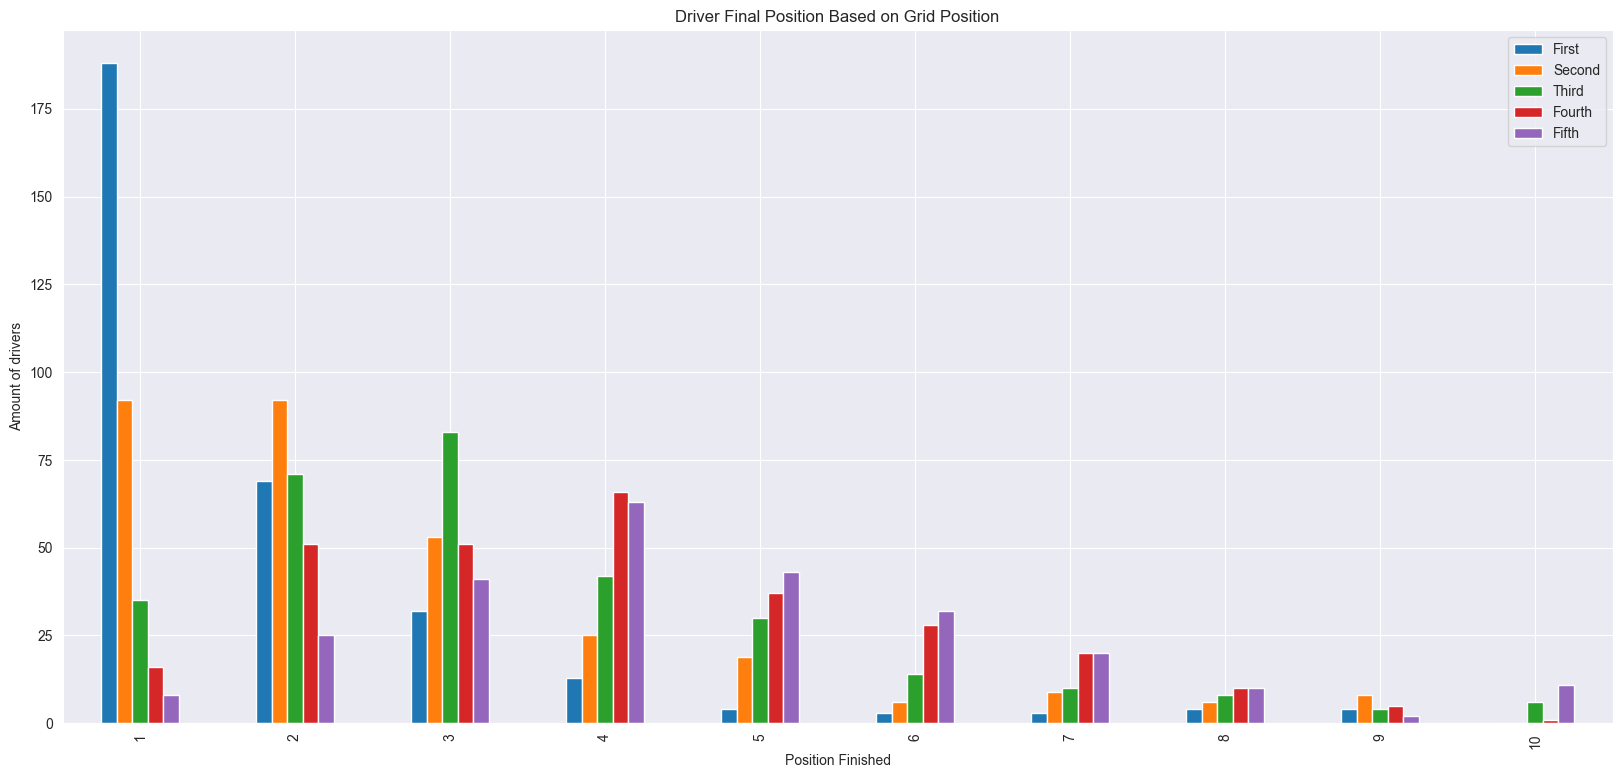

In [142]:
import matplotlib.pyplot as plt
index = ['1', '2', '3' ,'4','5','6','7','8','9','10']
barPlot = pd.DataFrame({
    'First' : first,
    'Second' : second,
    'Third' : third,
    'Fourth' : fourth,
    'Fifth' : fifth
}, index = index)
barPlot.plot.bar(title="Driver Final Position Based on Grid Position", figsize=(20,9), grid = True)
plt.xlabel('Position Finished')
plt.ylabel('Amount of drivers')
plt.show()

## Normal Distribution from this data to find wether the correlation between starting grid position and final position is correlated

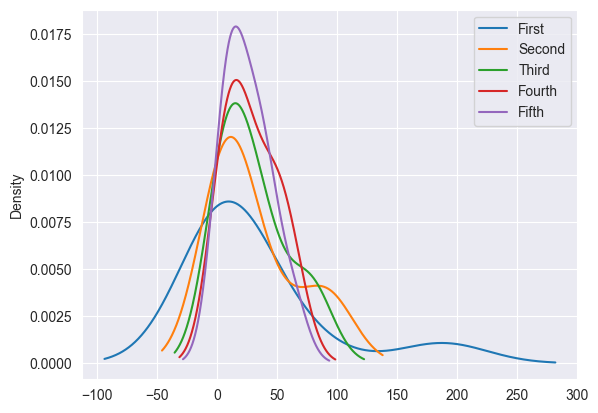

In [144]:
normal = pd.DataFrame({
    'First' : first,
    'Second' : second,
    'Third' : third,
    'Fourth' : fourth,
    'Fifth' : fifth
})
ax = normal.plot.kde()

From this data, you can see that the most normally distributed data is the 'Fifth' and least is 'Second'

## Question 2 : If you qualify 1,2 or 3, what is the chance you will finish on the podium?

In [145]:
# 1 grid, 1 Position = 58.39% chance of finishing 1
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 1)].shape[0]/322*100

58.38509316770186

In [146]:
# 1 grid, 2 Position = 21.43% chance of finishing 2
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 2)].shape[0]/322*100

21.428571428571427

In [149]:
# 1 grid, 3 Position = 9.94% chance of finishing 3
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 3)].shape[0]/322*100

9.937888198757763

In [163]:
# 1 grid, > 3 Position = 10.25% chance of finishing > 3
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] > 3)].shape[0]/322*100

10.248447204968944

### Given a first place qualification, drivers have a 89.75% chance of finishing on the podium and a 10.25% chance of missing a podium

In [165]:
# 2 grid,  1 Position = 28.57% chance of finishing 1
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 1)].shape[0]/322*100

28.57142857142857

In [168]:
# 2 grid,  2 Position = 28.57% chance of finishing 2
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 2)].shape[0]/322*100

28.57142857142857

In [169]:
# 2 grid,  3 Position = 16.46% chance of finishing 3
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 3)].shape[0]/322*100

16.459627329192546

In [171]:
# 2 grid,> 3 Position = 24.53% chance of finishing > 3
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] > 3)].shape[0]/322*100

24.53416149068323

### Given a second place qualification: Drivers have a 73.6% chance of finishing on the podium and a 24.53% chance of missing the podium

In [173]:
# 3 grid,  1 Position = 10.87% chance of finishing 1
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 1)].shape[0]/322*100

10.869565217391305

In [176]:
# 3 grid,  2 Position = 22.05% chance of finishing 2
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 2)].shape[0]/322*100

22.049689440993788

In [177]:
# 3 grid,  3 Position = 25.78% chance of finishing 3
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 3)].shape[0]/322*100

25.77639751552795

In [178]:
# 3 grid,  > 3 Position = 10.87% chance of finishing > 3
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] > 3)].shape[0]/322*100

36.33540372670808

### Given a third place qualification: drivers have a 58.7% chance of finishing on the podium, and a 36.34% chance of missing the podium

# Section 2

## Between 2013 and 2014, a decision was made to manipulate the formula of the cars. Starting in 2014, there would be a new V6 engine with 1600cc / 8 gearbox

CC is the displacement volume of the engine, so it means that the engine has more cylinders and a higher swept volume which directly translates into horsepower and torque of the vehicle

https://bleacherreport.com/articles/2003467-are-2014-formula-1-cars-slower-analysing-lap-times-at-australian-grand-prix

Between 2013 and 2014, there was a 1.77 second drop on fastest average laptime between racers that stayed on the same team.

**Sebastian Vettel: Difference in Race times between 2013 and 2014 average in each race: -2.29 seconds**

**Fernando Alonso: Difference in Race times between 2013 and 2014 average in each race: -2.07 seconds**

**Nico Rosberg: Difference in Race times between 2013 and 2014 average in each race: -1.78 seconds**

**Felipe Massa: Difference in Race times between 2013 and 2014 average in each race: -0.92 seconds**

### Checking the drivers average lap time below

In [179]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Vettel'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
1861,22064,2,1,51.0,1:43.893,192.451,Vettel,Finished,2013,Abu Dhabi Grand Prix,Red Bull
1892,22525,19,8,51.0,1:45.552,189.427,Vettel,Finished,2014,Abu Dhabi Grand Prix,Red Bull
1838,21714,1,3,42.0,1:30.409,211.160,Vettel,Finished,2013,Australian Grand Prix,Red Bull
1843,21778,2,1,55.0,1:36.961,200.938,Vettel,Finished,2013,Bahrain Grand Prix,Red Bull
1867,22179,10,6,18.0,1:39.312,196.181,Vettel,Finished,2014,Bahrain Grand Prix,Red Bull
1854,21932,2,1,40.0,1:50.756,227.657,Vettel,Finished,2013,Belgian Grand Prix,Red Bull


In [189]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Alonso'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
1207,22068,10,5,55.0,1:43.434,193.305,Alonso,Finished,2013,Abu Dhabi Grand Prix,Ferrari
1234,22526,8,9,45.0,1:47.424,186.126,Alonso,Finished,2014,Abu Dhabi Grand Prix,Ferrari
1183,21713,5,2,53.0,1:29.560,213.162,Alonso,Finished,2013,Australian Grand Prix,Ferrari
1529,22133,5,4,57.0,1:33.186,204.867,Alonso,Finished,2014,Australian Grand Prix,Ferrari
1220,22288,4,5,58.0,1:12.595,214.527,Alonso,Finished,2014,Austrian Grand Prix,Ferrari
1188,21785,3,8,41.0,1:37.204,200.436,Alonso,Finished,2013,Bahrain Grand Prix,Ferrari


In [190]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Rosberg'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
2742,22066,3,3,51.0,1:44.458,191.410,Rosberg,Finished,2013,Abu Dhabi Grand Prix,Mercedes
3079,22130,3,1,19.0,1:32.478,206.436,Rosberg,Finished,2014,Australian Grand Prix,Mercedes
2758,22284,3,1,50.0,1:12.598,214.518,Rosberg,Finished,2014,Austrian Grand Prix,Mercedes
2721,21786,1,9,48.0,1:37.588,199.647,Rosberg,Finished,2013,Bahrain Grand Prix,Mercedes
2750,22175,1,2,49.0,1:37.020,200.816,Rosberg,Finished,2014,Bahrain Grand Prix,Mercedes
2732,21935,4,4,39.0,1:51.582,225.971,Rosberg,Finished,2013,Belgian Grand Prix,Mercedes


In [191]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Massa'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
625,22519,4,2,47.0,1:44.826,190.738,Massa,Finished,2014,Abu Dhabi Grand Prix,Williams
1208,22071,7,8,52.0,1:45.447,189.615,Massa,Finished,2013,Abu Dhabi Grand Prix,Ferrari
1184,21715,4,4,38.0,1:30.239,211.558,Massa,Finished,2013,Australian Grand Prix,Ferrari
608,22287,1,4,63.0,1:12.586,214.553,Massa,Finished,2014,Austrian Grand Prix,Williams
604,22180,7,7,40.0,1:39.272,196.260,Massa,Finished,2014,Bahrain Grand Prix,Williams
1189,21792,4,15,42.0,1:38.839,197.120,Massa,Finished,2013,Bahrain Grand Prix,Ferrari


In [192]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Ricciardo'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
1893,22521,20,4,50.0,1:44.496,191.341,Ricciardo,Finished,2014,Abu Dhabi Grand Prix,Red Bull
1874,22291,5,8,55.0,1:13.060,213.161,Ricciardo,Finished,2014,Austrian Grand Prix,Red Bull
1868,22177,13,4,38.0,1:39.269,196.266,Ricciardo,Finished,2014,Bahrain Grand Prix,Red Bull
2166,22373,5,1,44.0,1:52.974,223.187,Ricciardo,Finished,2014,Belgian Grand Prix,Red Bull
2310,21941,19,10,38.0,1:50.967,227.224,Ricciardo,Finished,2013,Belgian Grand Prix,Toro Rosso
1876,22308,8,3,34.0,1:38.459,215.395,Ricciardo,Finished,2014,British Grand Prix,Red Bull


In [195]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Button'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
171,22075,12,12,43.0,1:46.336,188.030,Button,Finished,2013,Abu Dhabi Grand Prix,McLaren
194,22522,6,5,47.0,1:46.739,187.320,Button,Finished,2014,Abu Dhabi Grand Prix,McLaren
150,21720,10,9,41.0,1:30.198,211.654,Button,Finished,2013,Australian Grand Prix,McLaren
359,22132,10,3,39.0,1:32.917,205.460,Button,Finished,2014,Australian Grand Prix,McLaren
178,22294,11,11,60.0,1:12.858,213.752,Button,Finished,2014,Austrian Grand Prix,McLaren
155,21787,10,10,49.0,1:37.743,199.330,Button,Finished,2013,Bahrain Grand Prix,McLaren


In [193]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Bottas'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
626,22520,3,3,54.0,1:45.727,189.113,Bottas,Finished,2014,Abu Dhabi Grand Prix,Williams
763,22134,15,5,56.0,1:32.616,206.128,Bottas,Finished,2014,Australian Grand Prix,Williams
609,22286,2,3,63.0,1:12.581,214.568,Bottas,Finished,2014,Austrian Grand Prix,Williams
587,21791,15,14,57.0,1:38.192,198.419,Bottas,Finished,2013,Bahrain Grand Prix,Williams
605,22181,3,8,50.0,1:39.762,195.296,Bottas,Finished,2014,Bahrain Grand Prix,Williams
592,21946,20,15,31.0,1:52.688,223.754,Bottas,Finished,2013,Belgian Grand Prix,Williams


In [194]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Hamilton'))].sort_values(by=['surname','name_x']).head(6)

,resultId,grid,positionOrder,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,name_x,name_y
2741,22070,4,7,47.0,1:45.463,189.586,Hamilton,Finished,2013,Abu Dhabi Grand Prix,Mercedes
2775,22518,2,1,49.0,1:45.599,189.342,Hamilton,Finished,2014,Abu Dhabi Grand Prix,Mercedes
2716,21716,3,5,45.0,1:29.759,212.689,Hamilton,Finished,2013,Australian Grand Prix,Mercedes
2757,22285,9,2,41.0,1:12.217,215.650,Hamilton,Finished,2014,Austrian Grand Prix,Mercedes
2720,21782,9,5,48.0,1:38.204,198.395,Hamilton,Finished,2013,Bahrain Grand Prix,Mercedes
2749,22174,2,1,49.0,1:37.108,200.634,Hamilton,Finished,2014,Bahrain Grand Prix,Mercedes


<Axes: title={'center': '2013 Indicator against 2014 Average Lap Time'}>

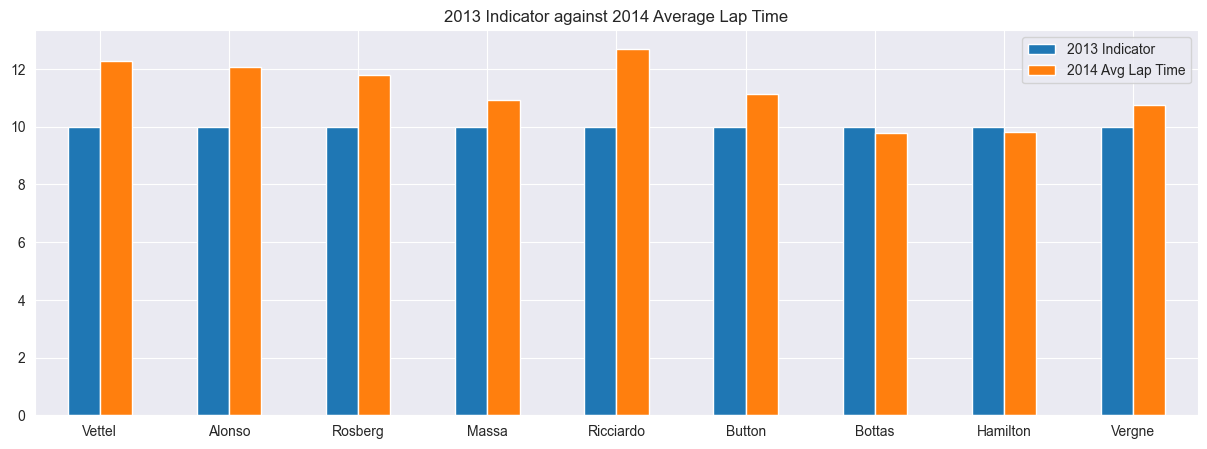

In [196]:
# The chart below signifies a 2014 average lap time versus a 2013 indicator time.
Initial = [10,10,10,10, 10, 10, 10, 10, 10]
SpeedIn2014 = [12.29, 12.07, 11.78, 10.92, 12.71, 11.12, 9.79, 9.82, 10.77]
index = ['Vettel', 'Alonso', 'Rosberg', 'Massa', 'Ricciardo', 'Button', 'Bottas', 'Hamilton', 'Vergne']
df = pd.DataFrame({'2013 Indicator': Initial, '2014 Avg Lap Time': SpeedIn2014}, index=index)
df.plot.bar(rot=0, figsize=(15,5), title = '2013 Indicator against 2014 Average Lap Time')